In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from rdkit import Chem


# Estruturando DataFrame esteroides

In [ ]:
# test
df_steroids_MB = pd.read_csv('df_MB_esteroids.csv', converters={'m/z': eval,'int.rel': eval})
df_steroids_MB.drop(['Molecule','Unnamed: 0'], axis = 1, inplace = True)
#df_steroids.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_steroids_MB = df_steroids_MB[['Smiles','m/z', 'Intensity','int.rel']]
df_steroids_MB

In [ ]:
# colocando mz e int.rel em 2 colunas 
## separando m/z
mz_temp = []
mz_temp = df_steroids_MB['m/z']
#mz_temp
## separando int.rel
rel_temp = []
rel_temp = df_steroids_MB['int.rel']


# encontrando exact mass do banco do inmetro
mz_MB = []
round_mz_MB = []
exact_mass_MB = []
#df_esteroid_inmetro2 = pd.DataFrame()
mz_MB = df_steroids_MB['m/z']

for z in range(0,len(mz_MB)):
    try:
        round_mz_MB = [round(mz) for mz in mz_temp[z]]
    except:
        pass
    exact_mass_MB.append(round_mz_MB[-1])
    
#exact_mass_MB

df_steroids_MB['exact_mass'] = exact_mass_MB
df_steroids_MB2 = df_steroids_MB[['Smiles','exact_mass','m/z', 'Intensity','int.rel']]
df_steroids_MB2

,Smiles,m/z,Intensidade,Relative,y,Molecule
0,C[Si](C)(C)OC1=CCC2C3CC[C@H]4C[C@@H](CC[C@@H]4...,"[91.05, 105.07, 117.07, 129.07, 131.09, 143.09...","[231146768.0, 128324968.0, 114517600.0, 117576...","[26.52, 14.72, 13.14, 13.49, 20.19, 21.86, 17....",S1\n,
1,C[Si](C)(C)OC1=CC2=CCC3C=4CCC(C)(C)C=4C[C@H](O...,"[91.05, 165.07, 177.07, 179.09, 180.1, 191.09,...","[56329556.0, 41360236.0, 44526020.0, 121373288...","[7.46, 5.48, 5.9, 16.08, 6.83, 8.4, 59.09, 5.4...",S1\n,
2,C[Si](C)(C)OC=1CC[C@@H]2C3CC[C@@]4(C)C(CC[C@@H...,"[79.05, 91.05, 105.07, 129.07, 133.1, 147.07, ...","[54903504.0, 105409040.0, 94062976.0, 85570696...","[6.13, 11.77, 10.5, 9.55, 8.27, 9.97, 23.34, 3...",S1\n,
3,C[Si](C)(C)OC=1C[C@H](C)[C@]2(C)C3CC[C@@]4(C)C...,"[79.05, 81.07, 91.05, 93.07, 105.07, 119.09, 1...","[49975440.0, 35029608.0, 84804320.0, 42127616....","[1.82, 1.27, 3.08, 1.53, 3.3, 1.76, 1.6, 100.0...",S1\n,
4,C[Si](C)(C)O[C@@]1(C)CCC2C3C(CC[C@@]21C)[C@@]1...,"[79.05, 81.07, 91.05, 93.07, 105.07, 107.09, 1...","[96925224.0, 97649200.0, 108440720.0, 11179304...","[3.06, 3.08, 3.42, 3.53, 3.64, 3.17, 3.46, 3.6...",S1\n,
5,C[Si](C)(C)OC1=CCC2C3CCC4=C(Cl)[C@@H](CC[C@]4(...,"[91.05, 105.07, 117.07, 129.07, 131.09, 169.1,...","[124337016.0, 120101264.0, 72646640.0, 7071304...","[35.96, 34.74, 21.01, 20.45, 23.52, 100.0, 44....",S1\n,
6,C[Si](C)(C)OC=1CC[C@@H]2C3CC[C@@]4(C)C(CC[C@]4...,"[91.05, 105.07, 143.09, 147.12, 169.1, 193.1, ...","[91329952.0, 85202040.0, 66043784.0, 102374320...","[10.5, 9.8, 7.59, 11.77, 6.81, 26.18, 10.58, 1...",S1\n,
7,C[Si](C)(C)OC=1CC[C@]2(C)C3CC[C@@]4(C)C(CC[C@]...,"[91.05, 105.07, 129.07, 143.09, 169.1, 171.12,...","[79554848.0, 69683448.0, 71126984.0, 71549480....","[5.28, 4.62, 4.72, 4.74, 11.65, 5.53, 8.61, 9....",S1\n,
8,C[Si](C)(C)OC1=CC2CCC3C4CC[C@](C)(O[Si](C)(C)C...,"[79.05, 91.05, 93.07, 105.07, 107.09, 115.06, ...","[24366360.0, 29887934.0, 22490716.0, 25248998....","[5.92, 7.26, 5.46, 6.13, 3.8, 6.06, 4.68, 6.44...",S1\n,
9,C[Si](C)(C)OC=1CC[C@@H]2C3CC[C@@]4(C)C(CC[C@@H...,"[79.05, 91.05, 92.99, 105.07, 117.07, 129.07, ...","[33052448.0, 82962768.0, 43189036.0, 47192780....","[10.09, 25.33, 13.19, 14.41, 16.65, 11.8, 16.9...",S1\n,

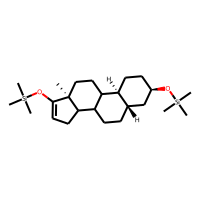
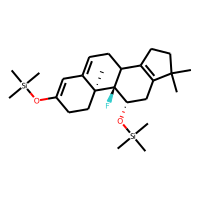
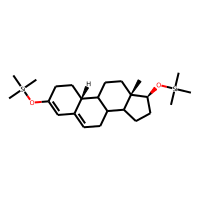
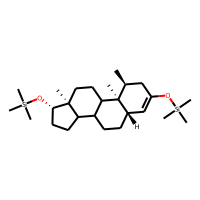
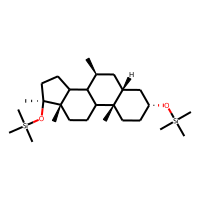
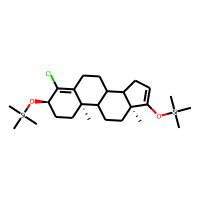
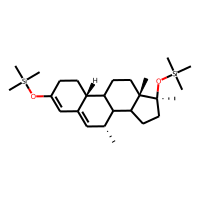
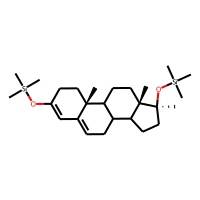
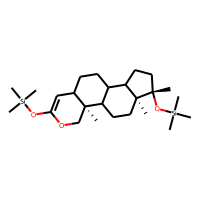
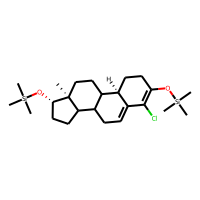
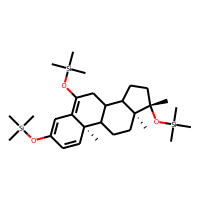
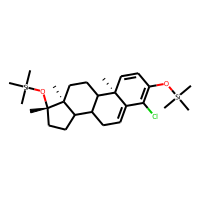
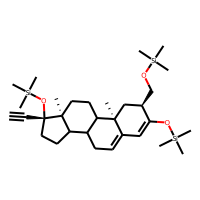
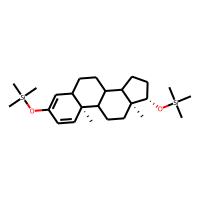
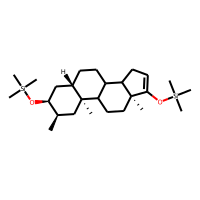
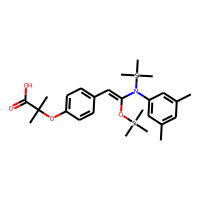
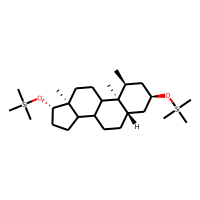
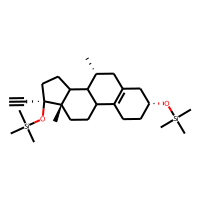
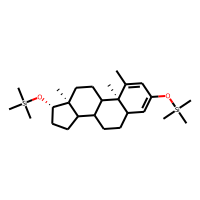
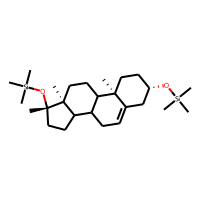
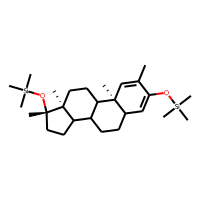
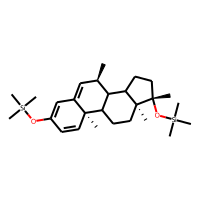
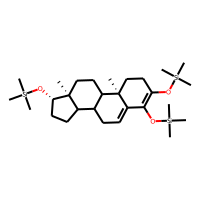
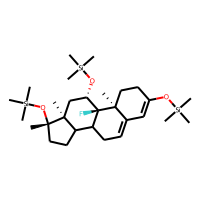
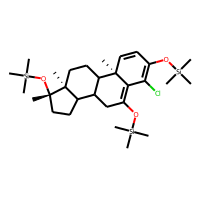
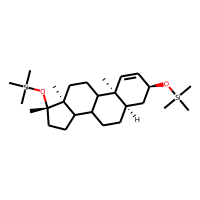
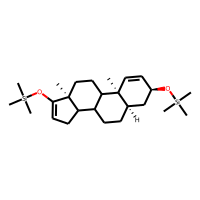
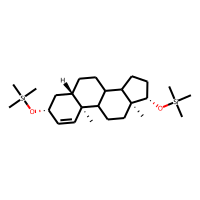

In [2]:
from rdkit.Chem import PandasTools
df_esteroid_inmetro = pd.read_csv('df_steroid_inmetro.csv', converters={'m/z':eval,'Relative':eval})
df_esteroid_inmetro.drop(['Unnamed: 0'], axis=1, inplace=True)
df_esteroid_inmetro.drop(labels=13,axis=0, inplace = True)
PandasTools.AddMoleculeColumnToFrame(df_esteroid_inmetro,'Smiles','Molecule',includeFingerprints=True)
df_esteroid_inmetro


In [ ]:
# colocando mz e int.rel em 2 colunas 
## separando m/z
mz_temp = []
mz_temp = df_esteroid_inmetro['m/z']
#mz_temp
## separando int.rel
rel_temp = []
rel_temp = df_esteroid_inmetro['Relative']


In [ ]:
# encontrando exact mass do banco do inmetro
mz_inmetro = []
round_mz_in = []
exact_mass_in = []
df_esteroid_inmetro2 = pd.DataFrame()
mz_inmetro = df_esteroid_inmetro['m/z']

for z in range(0,len(mz_inmetro)):
    try:
        round_mz_in = [round(mz) for mz in mz_temp[z]]
    except:
        pass
    exact_mass_in.append(round_mz_in[-1])
    
exact_mass_in

df_esteroid_inmetro['exact_mass'] = exact_mass_in
df_esteroid_inmetro2 = df_esteroid_inmetro[['Smiles','exact_mass','m/z', 'Intensidade','Relative']]
df_esteroid_inmetro2 = df_esteroid_inmetro2.rename(columns={'Intensidade':'Intensity', 'Relative':'int.rel'})
df_esteroid_inmetro2 = df_esteroid_inmetro2.reset_index(drop=True)
df_esteroid_inmetro2.head(15)

In [ ]:
for i in range(0,len(df_esteroid_inmetro2)):
    for k in range(0,len(df_esteroid_inmetro2['int.rel'][i])):
        df_esteroid_inmetro2['int.rel'][i][k] = df_esteroid_inmetro2['int.rel'][i][k]*10
rel_int=[]
rel_int = df_esteroid_inmetro2['int.rel']
rel_int[1]

In [ ]:
# concatenando MB e INmetro df
import csv
df_steroids_inmetro_MB = pd.concat([df_esteroid_inmetro2, df_steroids_MB2])
df_steroids_inmetro_MB.to_csv('df_steroids_inmetro_MB.csv', index = False)

# Importando DF MassBank e Inmetro

In [ ]:
df_steroids = pd.read_csv('df_steroids_inmetro_MB.csv', converters={'m/z':eval, 'int.rel':eval})
pd. set_option("display.max_rows", None)

df_steroids = df_steroids.reset_index(drop=True)
df_steroids
#df_steroids

In [ ]:
# colocando mz e int.rel em 2 colunas 
## separando m/z
mz_temp = df_steroids['m/z']
#mz_temp
## separando int.rel

rel_temp = df_steroids['int.rel']
mz_temp[0]



In [ ]:
# Smiles Canonicos
mols = [Chem.MolFromSmiles(x) for x in df_steroids['Smiles']]
smi_canonic = [Chem.MolToSmiles(i,isomericSmiles= False) for i in mols]
df_steroids['Smiles'] = smi_canonic
df_steroids

In [ ]:
# Arredondando massa exata e MZ
## massa exata
exact_mz = []
exact_mz = [round(EM) for EM in df_steroids['exact_mass']]

## valores de MZ
round_mz = []
mz_temp2 = mz_temp
for z in range(0,105):
    mz_temp2[z] = [round(mz) for mz in mz_temp[z]]

## valores de Rel
round_rel = []
round_rel = [round(r) for r in rel_temp[0]]

exact_mz[0]

In [ ]:
# buscando lista de m/z (artigo)
mz4steroid_subtracao = [15,29,90,180,270,105,195,285,119,209,103,193,283,143,155,140,157,144]
sinais_mz = [103,129,143,169,244,218,231]

# aplicando subtracao da massa exata para gerar os possiveis fragmentos
list_frags = []
frags = []
for f in range(0,len(exact_mz)):
    for m in range(0, len(mz4steroid_subtracao)):
        frags.append(exact_mz[f] - mz4steroid_subtracao[m])
    list_frags += [frags]
    frags = []

list_frags[0][0]


In [ ]:
mz_round_test = [round(v) for v in df_steroids['m/z'][3]]
mz_round_test

In [ ]:
mz_round = []
rel_temp = []
rel_temp = df_steroids['int.rel']

# colocando pesos nas intensidade relativa na possição correção
weight_df = pd.DataFrame(np.zeros((len(exact_mz),len(mz4steroid_subtracao)), dtype = int))
colunas = [str(x) for x in mz4steroid_subtracao]
weight_df.columns = colunas
weight_df


# encontrando os index dos fragmentos presentes na amostra
for n_lista in range(len(df_steroids['exact_mass'])):
    mz_round = [round(v) for v in df_steroids['m/z'][n_lista]]
    for ind, elementos in enumerate(mz_round):
        if elementos in list_frags[n_lista]:
            index_frag = list_frags[n_lista].index(elementos)
            if (rel_temp[n_lista][ind])/10 < 25.0:
                weight_df.iloc[n_lista, index_frag] = 1
            elif (rel_temp[n_lista][ind])/10 > 25.0 and rel_temp[n_lista][ind]/10 < 50:
                weight_df.iloc[n_lista, index_frag] = 2
            else:
                weight_df.iloc[n_lista, index_frag] = 3
        else:
            pass
weight_df.head(106)
        

In [ ]:
# encontrando sinais mz
weight_df2 = pd.DataFrame(np.zeros((len(exact_mz),len(sinais_mz)), dtype = int))
colunas = [str(x) for x in sinais_mz]
weight_df2.columns = colunas
weight_df2


# encontrando os index dos fragmentos presentes na amostra
for n_lista in range(len(df_steroids['exact_mass'])):
    mz_round = [round(v) for v in df_steroids['m/z'][n_lista]]
    for ind, elementos in enumerate(mz_round):
        if elementos in sinais_mz:
            index_frag = sinais_mz.index(elementos)
            if (rel_temp[n_lista][ind])/10 < 25.0:
                weight_df2.iloc[n_lista, index_frag] = 1
            elif (rel_temp[n_lista][ind])/10 > 25.0 and rel_temp[n_lista][ind]/10 < 50:
                weight_df2.iloc[n_lista, index_frag] = 2
            else:
                weight_df2.iloc[n_lista, index_frag] = 3
        else:
            pass




#for n_lista in range(len(exact_mz)):
#    for ind, elementos in enumerate(mz_temp[n_lista]):
#        if elementos in sinais_mz:
#            index_frag = sinais_mz.index(elementos)
#            if (rel_temp[n_lista][ind])/10  < 25.0:
#                weight_df2.iloc[n_lista, index_frag] = 1
#            elif (rel_temp[n_lista][ind])/10  > 25.0 and rel_temp[n_lista][ind]/10 < 50:
#                weight_df2.iloc[n_lista, index_frag] = 2
#            else:
#                weight_df2.iloc[n_lista, index_frag] = 3
#        else:
#            pass
weight_df2

In [ ]:
# encontrando peso da massa exata
exact_weight = []
for n_lista in range(0,len(df_steroids['exact_mass'])):
    intencity = rel_temp[n_lista][-1]
    if intencity < 25.0:
        exact_weight.append(1)
    elif intencity > 25.0  and intencity < 50.0:
        exact_weight.append(2)
    else:
        exact_weight.append(3)
exact_weight

In [ ]:
# concatenando fragmentos e sinais m/z
df_f = pd.concat([pd.DataFrame(exact_weight), weight_df,weight_df2], axis=1)
df_f

In [ ]:
# dando nome as variaveis
pd.set_option("display.max_rows", None)
#df_f = pd.DataFrame()
df_final = pd.DataFrame()
df_final = df_f.rename(columns={0:'exact_mass','15':'[M-15]', '29':'[M-29]', '90':'[M-90]', '180':'[M-2·90]', '270':'[M-3·90]', '105':'[M-90-15]',
                                '195':'[M-2·90-15]', '285':'[M-3·90-15]', '119':'[M-90-29]', '209':'[M-2·90-29]', '103':'[M-103]',
                                '193':'[M-103-90]', '283':'[M-103-2·90]', '143':'[M-143]', '155':'[M-155]','140':'[M-140]', '157':'[M-157]','144':'[M-144]'
                                    })
df_final

In [ ]:
df_ = pd.read_csv('df_esteroids_MB_IN_AR.csv', sep = ';')
df_

 # Função para impute de dados na aplicação

In [ ]:
# construindo função para struturar dados de massas de esteroides
# input de dados
def ms_weigher(mass,intencity_rel, exact_mass):
    ## separando m/z
    mz_temp = [float(x) for x in mass]
    
    ## separando int.rel
    rel_temp = [float(x)/10 for x in intencity_rel]

    # massa exata
    exact_mz = exact_mass
                                                                                                              
    # buscando lista de m/z (artigo)
    mz4steroid_subtracao = [15,29,90,180,270,105,195,285,119,209,103,193,283,143,155,140,157,144]
    sinais_mz = [103,129,143,169,244,218,231]
    
    # aplicando subtracao da massa exata para gerar os possiveis fragmentos
    list_frags = []
    frags = []
    for m in range(0, len(mz4steroid_subtracao)):
        frags.append(exact_mz - mz4steroid_subtracao[m])
    list_frags += [frags]
    frags = []
    
    # colocando pesos nas intensidade relativa na possição correção
    weight_df = pd.DataFrame(np.zeros((1,len(mz4steroid_subtracao)), dtype = int))
    colunas = [str(x) for x in mz4steroid_subtracao]
    weight_df.columns = colunas
    weight_df
    
    # encontrando os index dos fragmentos presentes na amostra
    for ind, elementos in enumerate(mz_temp):
        if elementos in list_frags[0]:
            index_frag = list_frags[0].index(elementos)
            if rel_temp[ind] < 25.0:
                weight_df.iloc[0, index_frag] = 1
            elif rel_temp[ind] > 25.0 and rel_temp[ind] < 50:
                weight_df.iloc[0, index_frag] = 2
            else:
                weight_df.iloc[0, index_frag] = 3
        else:
                pass
    
    # weight_df
    # encontrando sinais mz
    weight_df2 = pd.DataFrame(np.zeros((1,len(sinais_mz)), dtype = int))
    colunas = [str(x) for x in sinais_mz]
    weight_df2.columns = colunas
    for ind, elementos in enumerate(mz_temp):
        if elementos in sinais_mz:
            index_frag = sinais_mz.index(elementos)
            if rel_temp[ind] < 25.0:
                weight_df2.iloc[0, index_frag] = 1
            elif rel_temp[ind] > 25.0 and rel_temp[ind] < 50:
                weight_df2.iloc[0, index_frag] = 2
            else:
                weight_df2.iloc[0, index_frag] = 3
        else:
            pass
    
    # encontrando peso da massa exata
    index_exact = mass.index(exact_mz)
    intencity = intencity_rel[index_exact]
    if intencity < 25.0:
        exact_weight = 1
    elif intencity > 25.0  and intencity < 50.0:
        exact_weight = 2
    else:
        exact_weight = 3
    
         
    # concatenando fragmentos e sinais m/z
    weight_df = weight_df.values.tolist()
    weight_df2 = weight_df2.values.tolist()
    list_final =list([exact_weight,*weight_df[0],*weight_df2[0]])
    
    return list_final



In [ ]:


test = ms_weigher(mass=mz_temp[28],intencity_rel=rel_temp[28],exact_mass= 414)
test


### A fazer : como fazer um algoritmo para identificar a classe da qual o esteroide pertence 

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
 
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

mol = Chem.MolFromSmiles('O=C(C4)C=C(C3)C(C)(C4)C([H])(C2)C([H])(C3)C([H])(C1)C(C)(C2)C(C(C)=O)C1')
mol_with_atom_index(mol)

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
 
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

mol = Chem.MolFromSmiles('CC(C)CCCC(C)C1CCC2C1(CCC3C2CCC4=CCCC34C)C')
mol_with_atom_index(mol)

In [ ]:
# filtro 3-keto-1-en
db = df_steroids['Smiles']
db.drop_duplicates(inplace=True)
sub = 'C1CCC2C=CC(=O)CC2C1'
print(len(db))
y = []
for ind,smi in enumerate(db):
    mol = Chem.MolFromSmiles(smi)
    patt = Chem.MolFromSmarts(sub)
    try:
        hit_ats = list(mol.GetSubstructMatch(patt))
        hit_bonds = []
        for bond in patt.GetBonds():
            aid1 = hit_ats[bond.GetBeginAtomIdx()]
            aid2 = hit_ats[bond.GetEndAtomIdx()]
            hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

        y.append(ind)
    except:
        pass
from rdkit.Chem import Draw
print(y)
mols = [Chem.MolFromSmiles(x) for x in db.iloc[y].values]
Draw.MolsToGridImage(mols, molsPerRow=3)

In [ ]:
# filtro 3- hidroxi  saturado
# filter OH
from rdkit.Chem import Fragments
#Fragments.fr_Al_OH_noTert(mol1)

db = pd.DataFrame({'smiles':smi_canonic})['smiles']
sub = 'C1CCC(CC1)O[H]'
y_ = []
for ind,smi in enumerate(db):
    mol = Chem.MolFromSmiles(smi)
    patt = Chem.MolFromSmiles(sub)
    if Fragments.fr_Al_OH_noTert(mol) != 0:
        try:
            hit_ats = list(mol.GetSubstructMatch(patt))
            hit_bonds = []
            for bond in patt.GetBonds():
                aid1 = hit_ats[bond.GetBeginAtomIdx()]
                aid2 = hit_ats[bond.GetEndAtomIdx()]
                hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
            if not ind in y: 
                y_.append(ind)
        except:
            pass
    else:
        pass
print(y_)
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles(x) for x in db.iloc[y_].values]
Draw.MolsToGridImage(mols, molsPerRow=3)

In [ ]:
from rdkit.Chem import rdmolops

In [ ]:
# filtro 1- hidroxi 2- en 
#db = pd.DataFrame({'smiles':smi_canonic})['smiles']
db.drop_duplicates(inplace=True)
sub = 'C1CC=CC(C1)O'
y = []
for ind,smi in enumerate(db):
    mol = Chem.MolFromSmiles(smi)
    patt = Chem.MolFromSmarts(sub)
    try:
        hit_ats = list(mol.GetSubstructMatch(patt))
        hit_bonds = []
        for bond in patt.GetBonds():
            aid1 = hit_ats[bond.GetBeginAtomIdx()]
            aid2 = hit_ats[bond.GetEndAtomIdx()]
            hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

        y.append(ind)
    except:
        pass
print(y)
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles(x) for x in db.iloc[y].values]
Draw.MolsToGridImage(mols, molsPerRow=3)

In [ ]:
# filtro 3-keto-4-en
db = pd.DataFrame({'smiles':smi_canonic})['smiles']
db.drop_duplicates(inplace=True)
sub = 'C1CC=CC(=O)C1'
y = []
for ind,smi in enumerate(db):
    mol = Chem.MolFromSmiles(smi)
    patt = Chem.MolFromSmarts(sub)
    try:
        hit_ats = list(mol.GetSubstructMatch(patt))
        hit_bonds = []
        for bond in patt.GetBonds():
            aid1 = hit_ats[bond.GetBeginAtomIdx()]
            aid2 = hit_ats[bond.GetEndAtomIdx()]
            hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

        y.append(ind)
    except:
        pass
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles(x) for x in db.iloc[y].values]
Draw.MolsToGridImage(mols, molsPerRow=3)

In [ ]:
# filtro 1,4 dien - 3 keto 
#db = pd.DataFrame({'smiles':smi_canonic})['smiles']
db.drop_duplicates(inplace=True)
sub = 'C1C=CC(=O)C=C1'
y = []
for ind,smi in enumerate(db):
    mol = Chem.MolFromSmiles(smi)
    patt = Chem.MolFromSmarts(sub)
    try:
        hit_ats = list(mol.GetSubstructMatch(patt))
        hit_bonds = []
        for bond in patt.GetBonds():
            aid1 = hit_ats[bond.GetBeginAtomIdx()]
            aid2 = hit_ats[bond.GetEndAtomIdx()]
            hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

        y.append(ind)
    except:
        pass
print(y)
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles(x) for x in db.iloc[y].values]
Draw.MolsToGridImage(mols, molsPerRow=3)




In [ ]:
# filtro 3 keto saturado
#db = pd.DataFrame({'smiles':smi_canonic})['smiles']
db.drop_duplicates(inplace=True)
sub = 'C1CCC(=O)CC1'
y = []
for ind,smi in enumerate(db):
    mol = Chem.MolFromSmiles(smi)
    patt = Chem.MolFromSmarts(sub)
    try:
        hit_ats = list(mol.GetSubstructMatch(patt))
        hit_bonds = []
        for bond in patt.GetBonds():
            aid1 = hit_ats[bond.GetBeginAtomIdx()]
            aid2 = hit_ats[bond.GetEndAtomIdx()]
            hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())

        y.append(ind)
    except:
        pass
print(y)
from rdkit.Chem import Draw

mols = [Chem.MolFromSmiles(x) for x in db.iloc[y].values]
Draw.MolsToGridImage(mols, molsPerRow=3)

# Busca de sub estruturas com SMART Apartir daqui

In [ ]:
smile = db[47]
sub = '[CH2]1[CH2]C(O[C])[CH2][C][C]1'
m = Chem.MolFromSmiles(smile)
substructure = Chem.MolFromSmarts(sub)
print(m.GetSubstructMatches(substructure))
m

In [ ]:
# Grupo 1
# SMARTS 1-ene-3-keto steroids
match_1en_3_keto =[]
match_list=[]
for ind,smile in enumerate(db):
    m = Chem.MolFromSmiles(smile)
    substructure = Chem.MolFromSmarts('[Ch]1=[CH]C(=O)[CH2][Ch][C]1')
    if m.GetSubstructMatches(substructure)!=():
        match_list.append(ind)
match_1en_3_keto = match_list
mols = [Chem.MolFromSmiles(x) for x in db.iloc[match_list].values]
Draw.MolsToGridImage(mols, molsPerRow=1)

In [ ]:
# Grupo 2

# SMARTS 3-hidroxy with satured A ring steroids
match_3_oh =[]
match_list=[]
for ind,smile in enumerate(db):
    m = Chem.MolFromSmiles(smile)
    substructure_si = Chem.MolFromSmarts('[CH2]1[CH2]C(O[Si])[CH2][C][C]1')
    substructure_OH = Chem.MolFromSmarts('[CH2]1[CH2]C([Oh])[CH2][C][C]1')
    if m.GetSubstructMatches(substructure_si)!=():
        match_list.append(ind)
    if m.GetSubstructMatches(substructure_OH)!=():
        match_list.append(ind)
match_3_oh = match_list
mols = [Chem.MolFromSmiles(x) for x in db.iloc[match_list].values]
Draw.MolsToGridImage(mols, molsPerRow=3)


In [ ]:
# Grupo 3
# SMARTS 1-ene-3-hidroxy steroids
match_1en_3_oh =[]
match_list=[]
for ind,smile in enumerate(db):
    m = Chem.MolFromSmiles(smile)
    substructure = Chem.MolFromSmarts('[CH]1=[CH]C(O)[CH2][CH][C]1')
    if m.GetSubstructMatches(substructure)!=():
        match_list.append(ind)
match_1en_3_oh = match_list
mols = [Chem.MolFromSmiles(x) for x in db.iloc[match_list].values]
Draw.MolsToGridImage(mols, molsPerRow=3)



In [ ]:
# Grupo 4
# SMARTS 4-ene-3-keto steroids
match_4en_3_keto =[]
match_list=[]
for ind,smile in enumerate(db):
    m = Chem.MolFromSmiles(smile)
    substructure = Chem.MolFromSmarts('[CH2]1[CH2]C(=O)[C]=[C][C]1')
    if m.GetSubstructMatches(substructure)!=():
        match_list.append(ind)
match_4en_3_keto = match_list
mols = [Chem.MolFromSmiles(x) for x in db.iloc[match_list].values]
Draw.MolsToGridImage(mols, molsPerRow=3)


In [ ]:
# Grupo 5
# SMARTS 1,4-diene-3-keto steroids
match_1_4en_3_keto =[]
match_list=[]
for ind,smile in enumerate(db):
    m = Chem.MolFromSmiles(smile)
    substructure = Chem.MolFromSmarts('[CH]1=[CH]C(=O)[C]=[C][C]1')
    if m.GetSubstructMatches(substructure)!=():
        match_list.append(ind)
match_1_4en_3_keto = match_list
mols = [Chem.MolFromSmiles(x) for x in db.iloc[match_list].values]
Draw.MolsToGridImage(mols, molsPerRow=3)

In [ ]:
# Grupo 6
# SMARTS 3-keto steroids with saturated A-ring
match_3_keto=[]
match_list=[]
for ind,smile in enumerate(db):
    m = Chem.MolFromSmiles(smile)
    substructure = Chem.MolFromSmarts('[CH2]1[CH2]C(=O)[CH2][CH][C]1')
    if m.GetSubstructMatches(substructure)!=():
        match_list.append(ind)
match_3_keto = match_list
mols = [Chem.MolFromSmiles(x) for x in db.iloc[match_list].values]
Draw.MolsToGridImage(mols, molsPerRow=3)

In [ ]:
all_match = [match_1en_3_keto,match_3_oh,match_1en_3_oh, match_4en_3_keto,match_1_4en_3_keto,match_3_keto]
all_match

In [ ]:

mols = Chem.MolFromSmiles('[H]C([H])([H])C([H])(CCCC(C)C1CCC2C3CCC4CC(O)CCC4(C)C3CCC12C)C([H])([H])[H]')
mols

In [ ]:
 match_3_oh.index

In [ ]:
all_match = []
for ind, smi in enumerate(db):
    if ind in match_3_oh:
        all_match.append(2)
    elif ind in match_1en_3_oh:
        all_match.append(3)
    elif ind in match_4en_3_keto:
        all_match.append(4)
    elif ind in match_1_4en_3_keto:
        all_match.append(5)
    elif ind in match_3_keto:
        all_match.append(6)
    else:
        all_match.append(0)
all_match

In [ ]:
# Tratar os NANs
pd.set_option('display.max_columns', None)
lista = list(db.index)
db_xi_yi = pd.concat([pd.DataFrame(all_match),df_final.loc[lista,:]], axis =1)
db_xi_yi.dropna(inplace=True)
db_xi_yi

In [ ]:
db_xi_yi.to_csv('db_xi_yi_final.csv')

In [1]:
df_artigo = pd.read_excel('dados/Doutorado/Projeto_Cheminformatic/dados_artigos_mass_new2.xlsx')
df_artigo

NameError: name 'pd' is not defined

In [ ]:
df_completo = pd.concat([df])

In [ ]:
# Jeff code
from rdkit import Chem
from rdkit.Chem.Draw import rdMolDraw2D
smi = 'CC12CCC3C(C1CCC2O)CCC4=CC(=O)CCC34C'
#smi = 'C[C@]12CC[C@H]3[C@@H](CCC4CC(=O)CC=C34)[C@@H]1CC[C]2O'
#smi = 'C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)C=CC34)[C@@H]1CC[C]2O'
sub = '[CH2]1[CH2]C(=O)[C]=[C][C]1' #SMART REGEX
mol = Chem.MolFromSmiles(smi)
patt = Chem.MolFromSmarts(sub, mergeHs=True)

hit_bonds = []
hit_ats = list(mol.GetSubstructMatches(patt))
test = hit_ats
hit_ats = hit_ats[0]
for bond in patt.GetBonds():
    aid1 = hit_ats[bond.GetBeginAtomIdx()]
    aid2 = hit_ats[bond.GetEndAtomIdx()]
    hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
d = rdMolDraw2D.MolDraw2DSVG(700, 700)
rdMolDraw2D.PrepareAndDrawMolecule(d,
                                   mol,
                                   highlightAtoms=hit_ats,
                                   highlightBonds=hit_bonds)

mol

# Modelos de ML

In [ ]:
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [ ]:
pd.set_option('display.max_columns', None)
df_model = pd.read_csv('df_esteroids_MB_IN_AR.csv', sep=";")
#df_model.drop(['Unnamed: 0'], axis= 1, inplace=True)
df_model

In [ ]:
xi = df_model.iloc[:,1:27]
xi

In [ ]:
yi=df_model.iloc[:,0]
yi

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xi,yi, random_state=2)

In [ ]:
X_train


In [ ]:
RFC = RandomForestClassifier(random_state=1)

In [ ]:
model_RFC = RFC.fit(X_train,y_train)

In [ ]:
prediction_RFC = model_RFC.predict(X_test)

In [ ]:
mc = confusion_matrix(y_test,prediction)
mc

In [ ]:
plot_confusion_matrix(RFC, X_test, y_test)  
#plt.show()

In [ ]:
# MCC
matthews_corrcoef(y_test, prediction_RFC)

In [ ]:
# Extreme Gradiend Boost - XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
xgb_c = xgb.XGBRFClassifier(random_state=1)

In [ ]:
help(xgb_c.fit)

In [ ]:
model_xgb = xgb_c.fit(X_train,y_train)
prediction_xgb = model_xgb.predict(X_test)
mc = confusion_matrix(y_test,prediction_xgb)
mc


In [ ]:
help(xgb.XGBClassifier())

# search seed and avaliation

In [ ]:
from sklearn import metrics

In [ ]:

accuracy_RFC = metrics.accuracy_score(y_test,y_pred=prediction)
accuracy_RFC


In [ ]:
from sklearn.multiclass import 
# criar um modelo para cada classe
# criar um modelo para prever se o esteroid esta ou não na lista da WADA ou se é um modificado fazer comite machine

 # colocar o codigo em orientação objeto